In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pytry
import pickle
import glob
import pandas as pd
import os

from scipy import stats
import researchpy as rp

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

# MLP GridSearch
Testing q, theta (with LMUs only), and number of neurons

## Preprocess Data Without LMUs

In [6]:
data_dir = 'F:\\PhD\\Studies\\NEN002\\Data\\Gridsearches\\GridSearch_MLP_Raw'
test_param1 = 'Neurons'

In [7]:
neurons=[]
for fname in os.listdir(data_dir):
    neurons.append(fname)

In [8]:
run=[]
test_target=[]
test_out=[]
accuracy=[]

for folder in os.listdir(data_dir):
    for fname in os.listdir(data_dir+'//'+folder):
        dat = data_dir+'//'+folder+'//'+fname
        if 'test_target' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_target.append(a)
            run.append(fname.split('_')[0])
        elif 'test_out' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_out.append(a)
        elif 'accuracy' in fname:
            a = np.load(dat, allow_pickle=True) 
            accuracy.append(a)

In [9]:
x = pd.DataFrame(columns=['run','test_target','test_out', 'Accuracy'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i], accuracy[i]]

In [10]:
neurons1=pd.Series(neurons)
neurons1=neurons1.repeat(20)
neurons1=pd.DataFrame(neurons1)
neurons1.columns=[test_param1]
neurons1=neurons1.reset_index()

In [11]:
grid_mlp_raw=x.join(neurons1['Neurons'])
order=['50','100','150','200']
grid_mlp_raw=grid_mlp_raw.set_index('Neurons').loc[order]
grid_mlp_raw.reset_index(inplace=True)

## Preprocess Data With LMUs

In [14]:
data_dir = 'F:\\PhD\Studies\\NEN002\\Data\\Gridsearches\\GridSearch_MLP_LMU'
test_param1 = 'q'
test_param2 = 'Theta'
test_param3 = 'Neurons'

In [15]:
lst=[]
for fname in os.listdir(data_dir):
    lst.append(fname)

In [16]:
q=[]
theta=[]
neurons=[]

for i in range(len(lst)):
    q.append(lst[i].split('_')[0])
    theta.append(lst[i].split('_')[1])
    neurons.append(lst[i].split('_')[2])

In [28]:
run=[]
test_target=[]
test_out=[]
accuracy=[]

for folder in os.listdir(data_dir):
    for fname in os.listdir(data_dir+'\\'+folder):
        dat = data_dir+'\\'+folder+'\\'+fname
        if 'test_target' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_target.append(a)
            run.append(fname.split('_')[0])
        elif 'test_out' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_out.append(a)
        elif 'accuracy' in fname:
            a = np.load(dat, allow_pickle=True) 
            accuracy.append(a)

In [29]:
x = pd.DataFrame(columns=['run','test_target','test_out', 'Accuracy'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i], accuracy[i]]

In [30]:
q1=pd.Series(q)
q1=q1.repeat(20)
q1=pd.DataFrame(q1)
q1.columns=[test_param1]
q1=q1.reset_index()

theta1=pd.Series(theta)
theta1=theta1.repeat(20)
theta1=pd.DataFrame(theta1)
theta1.columns=[test_param2]
theta1=theta1.reset_index()

neurons1=pd.Series(neurons)
neurons1=neurons1.repeat(20)
neurons1=pd.DataFrame(neurons1)
neurons1.columns=[test_param3]
neurons1=neurons1.reset_index()

In [31]:
grid_mlp_lmu=x.join(q1)
grid_mlp_lmu=grid_mlp_lmu.join(theta1['Theta'])
grid_mlp_lmu=grid_mlp_lmu.join(neurons1['Neurons'])

order=['50','100','150','200']
grid_mlp_lmu=grid_mlp_lmu.set_index('Neurons').loc[order]
grid_mlp_lmu.reset_index(inplace=True)

# Interaction Plots

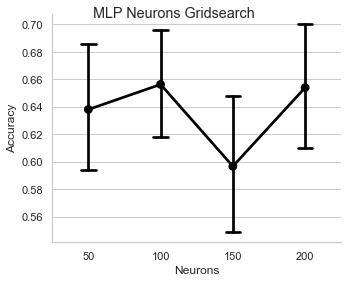

In [32]:
sns.set(style="whitegrid")
s_plt = sns.catplot(x="Neurons", y="Accuracy",
                  capsize=.2, height=4, aspect=1.25,
                  kind="point", order=['50','100','150','200'],
                  data=grid_mlp_raw, color='black')
plt.suptitle('MLP Neurons Gridsearch')
plt.show()
s_plt.savefig('mlprawgrid.png')

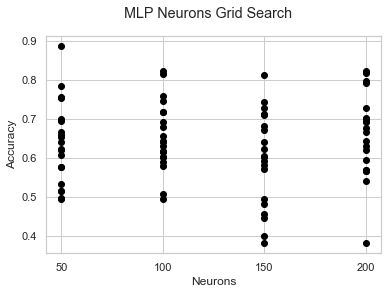

In [33]:
plt.scatter(grid_mlp_raw['Neurons'], grid_mlp_raw['Accuracy'], color='black')
plt.suptitle('MLP Neurons Grid Search')
plt.ylabel('Accuracy')
plt.xlabel('Neurons')
plt.savefig('mlprawgrid.png')
plt.show()

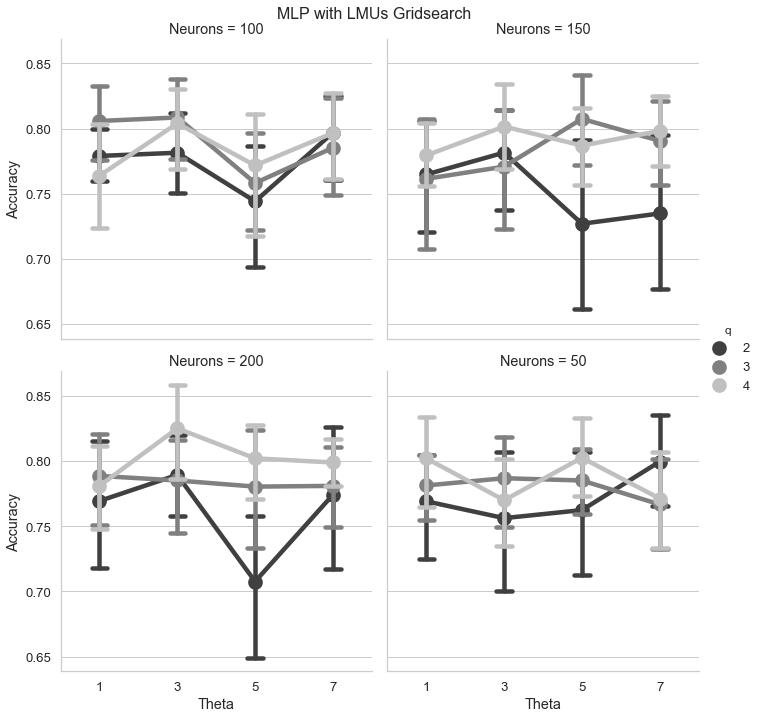

In [34]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

sns_plot = sns.catplot(x="Theta", y="Accuracy", hue="q", col="Neurons",
                capsize=.2, height=5, aspect=1, palette="gray",
                kind="point", data=grid_mlp_lmu,
               col_wrap=2, order=['1','3','5','7'])
plt.suptitle('MLP with LMUs Gridsearch', y=1, fontsize=16)
plt.show()
#sns_plot.savefig('mlplmugrid.png')

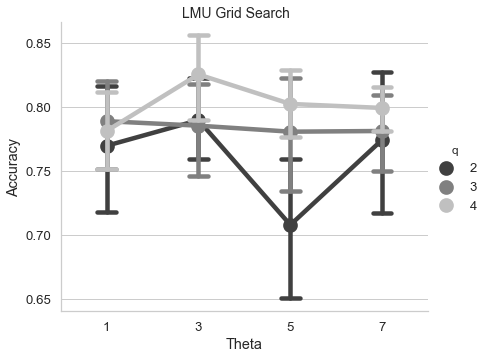

In [50]:
n200=grid_mlp_lmu['Neurons']=='200'

g = sns.catplot(x="Theta", y="Accuracy", hue='q',
                capsize=.2, height=5, aspect=1.25, palette="gray",
                kind="point", data=grid_mlp_lmu[n200],
                order=['1','3','5','7'])
plt.suptitle('LMU Grid Search', y=1, fontsize=14)
plt.savefig('mlplmugrid.png')
plt.show()

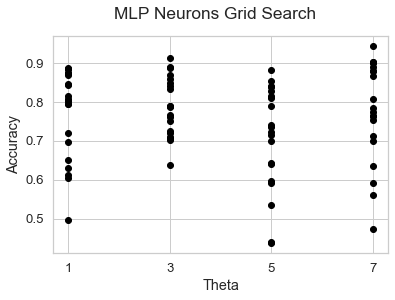

In [41]:
q2=grid_mlp_lmu['q']=='2'
new=grid_mlp_lmu[q2&n200]


plt.scatter(new['Theta'], new['Accuracy'], color='black')
plt.suptitle('MLP Neurons Grid Search')
plt.ylabel('Accuracy')
plt.xlabel('Theta')
plt.savefig('mlprawgrid.png')
plt.show()

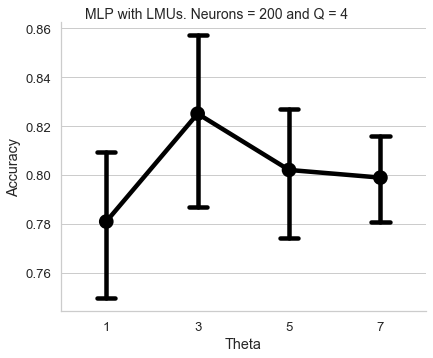

In [19]:
q4=grid_mlp_lmu['q']=='4'

g = sns.catplot(x="Theta", y="Accuracy",
                capsize=.2, height=5, aspect=1.25,
                kind="point", data=grid_mlp_lmu[q4&n200],
                order=['1','3','5','7'], color='black')
plt.suptitle('MLP with LMUs. Neurons = 200 and Q = 4', y=1, fontsize=14)
plt.show()

Best: <br>
    q = 4 <br>
    Theta = 3 <br>
    Neurons = 200 <br>

# Nengo DL GridSearch
Testing learning rate

## Preprocess Data Without LMUs

In [20]:
data_dir = 'D:\\NEN002\\GridSearch_NDL_Raw'
test_param1 = 'Learning_Rate'

In [21]:
lr=[]
for fname in os.listdir(data_dir):
    lr.append(fname)

In [22]:
run=[]
test_target=[]
test_out=[]

for folder in os.listdir(data_dir):
    for fname in os.listdir(data_dir+'//'+folder):
        dat = data_dir+'//'+folder+'//'+fname
        if 'test_target' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_target.append(a)
            run.append(fname.split('_')[0])
        elif 'test_out' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_out.append(a)

In [23]:
x = pd.DataFrame(columns=['run','test_target','test_out'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i]]

In [24]:
lr1=pd.Series(lr)
lr1=lr1.repeat(20)
lr1=pd.DataFrame(lr1)
lr1.columns=[test_param1]
lr1=lr1.reset_index()

In [25]:
grid_rnn_raw=x.join(lr1['Learning_Rate'])
order=['0.1', '0.001', '1e-05']
grid_rnn_raw=grid_rnn_raw.set_index('Learning_Rate').loc[order]
grid_rnn_raw.reset_index(inplace=True)

In [26]:
for i in range(len(grid_rnn_raw)):
    for j in range(len(grid_rnn_raw['test_out'][i])):
        for k in range(len(grid_rnn_raw['test_out'][i][j])):
            if np.argmin(grid_rnn_raw['test_out'][i][j][k])==1:
                grid_rnn_raw['test_out'][i][j][k]=[1,0]
            else:
                grid_rnn_raw['test_out'][i][j][k]=[0,1]

In [27]:
accuracy=[]
for i in range(len(grid_rnn_raw)):
    a=np.sum(np.vstack(grid_rnn_raw['test_target'][i])==np.vstack(grid_rnn_raw['test_out'][i]))/2
    b=len(np.vstack(grid_rnn_raw['test_target'][i]))
    accuracy.append(a/b)

In [28]:
accuracy=pd.DataFrame(accuracy)
accuracy.columns=['Accuracy']
grid_rnn_raw=grid_rnn_raw.join(accuracy['Accuracy'])

## Preprocess Data With LMUs

In [29]:
data_dir = 'D:\\NEN002\\GridSearch_NDL_LMU'
test_param1 = 'Learning_Rate'

In [30]:
lr=[]
for fname in os.listdir(data_dir):
    lr.append(fname)

In [31]:
run=[]
test_target=[]
test_out=[]

for folder in os.listdir(data_dir):
    for fname in os.listdir(data_dir+'//'+folder):
        dat = data_dir+'//'+folder+'//'+fname
        if 'test_target' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_target.append(a)
            run.append(fname.split('_')[0])
        elif 'test_out' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_out.append(a)

In [32]:
x = pd.DataFrame(columns=['run','test_target','test_out'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i]]

In [33]:
x = pd.DataFrame(columns=['run','test_target','test_out'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i]]

In [34]:
lr1=pd.Series(lr)
lr1=lr1.repeat(20)
lr1=pd.DataFrame(lr1)
lr1.columns=['Learning_Rate']
lr1=lr1.reset_index()

In [35]:
grid_rnn_lmu=x.join(lr1['Learning_Rate'])
order=['0.1', '0.001', '1e-05']
grid_rnn_lmu=grid_rnn_lmu.set_index('Learning_Rate').loc[order]
grid_rnn_lmu.reset_index(inplace=True)

In [36]:
for i in range(len(grid_rnn_lmu)):
    for j in range(len(grid_rnn_lmu['test_out'][i])):
        for k in range(len(grid_rnn_lmu['test_out'][i][j])):
            if np.argmin(grid_rnn_lmu['test_out'][i][j][k])==1:
                grid_rnn_lmu['test_out'][i][j][k]=[1,0]
            else:
                grid_rnn_lmu['test_out'][i][j][k]=[0,1]

In [37]:
accuracy=[]
for i in range(len(grid_rnn_lmu)):
    a=np.sum(np.vstack(grid_rnn_lmu['test_target'][i])==np.vstack(grid_rnn_lmu['test_out'][i]))/2
    b=len(np.vstack(grid_rnn_lmu['test_target'][i]))
    accuracy.append(a/b)

In [38]:
accuracy=pd.DataFrame(accuracy)
accuracy.columns=['Accuracy']
grid_rnn_lmu=grid_rnn_lmu.join(accuracy['Accuracy'])

# Interaction Plots

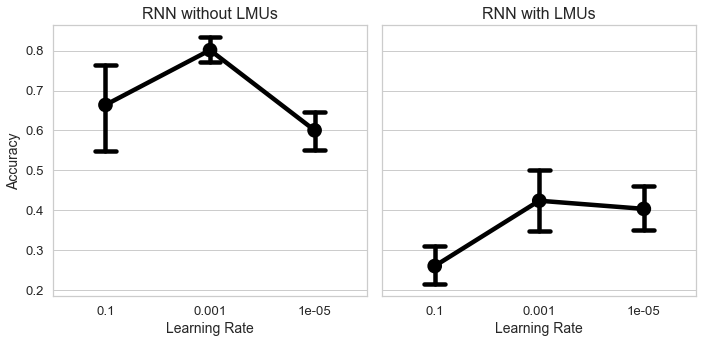

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 5))

#ax1 = fig.add_subplot(121)
sns.catplot(x="Learning_Rate", y="Accuracy",
                  capsize=.2, height=4, aspect=1.25,
                  kind="point", order=['0.1', '0.001', '1e-05'],
                  data=grid_rnn_raw, color='black', ax=ax1)
ax1.set_title('RNN without LMUs', fontsize=16)
ax1.set_xlabel('Learning Rate', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)

#ax2 = fig.add_subplot(122)
sns.catplot(x="Learning_Rate", y="Accuracy",
                  capsize=.2, height=4, aspect=1.25,
                  kind="point", order=['0.1', '0.001', '1e-05'],
                  data=grid_rnn_lmu, color='black', ax=ax2)
ax2.set_title('RNN with LMUs', fontsize=16)
ax2.set_xlabel('Learning Rate', fontsize=14)
ax2.set_ylabel('', fontsize=14)

plt.close(2)
plt.close(3)
plt.tight_layout()
fig.savefig('rnngrid.png')

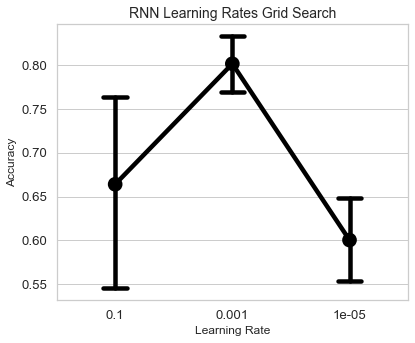

In [40]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

#ax1 = fig.add_subplot(121)
sns.catplot(x="Learning_Rate", y="Accuracy",
                  capsize=.2, height=4, aspect=1.25,
                  kind="point", order=['0.1', '0.001', '1e-05'],
                  data=grid_rnn_raw, color='black', ax=ax1)
ax1.set_title('RNN Learning Rates Grid Search', fontsize=14)
ax1.set_xlabel('Learning Rate', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)

plt.close(2)
plt.close(3)
plt.tight_layout()
fig.savefig('rnngrid.png')